In [ ]:
import numpy
from numpy import random
import math
import collections
import matplotlib.pyplot as plt

In [2]:
n = 100;
m = 20;
x_i = [];
d = [];
class_0 = [];
class_1 = [];

In [3]:
for i in range(0,n):
    temp = numpy.transpose(numpy.random.uniform(0,1,2));
    x_i.append(temp);
    
    x_1 = temp[0];
    x_2 = temp[1];
    
    if (x_2 < ((1/5) * numpy.sin(10*x_1) + 0.3)) or ((math.pow((x_2 - 0.8),2) + math.pow((x_1 - 0.5),2))) < math.pow(0.15,2):
        d.append(1);
        class_1.append(temp);
    else:
        d.append(-1);
        class_0.append(temp);

x_i = numpy.array(x_i);

In [4]:
x_class_1 = [];
y_class_1 = [];

x_class_0 = [];
y_class_0 = [];
for element in class_1:
    x_class_1.append(element[0]);
    y_class_1.append(element[1]);
    
for element in class_0:
    x_class_0.append(element[0]) ;
    y_class_0.append(element[1]);

In [5]:
print (len(class_0));
print (len(class_1));

59
41


In [6]:
numClusterCenters = int(m/2);
class0_cluster_indices = random.choice([i for i in range(0,len(class_0))],numClusterCenters);
class1_cluster_indices = random.choice([i for i in range(0,len(class_1))],numClusterCenters);

class0_cluster_centres = [class_0[i] for i in class0_cluster_indices];
class1_cluster_centres = [class_1[i] for i in class1_cluster_indices];

cluster_0_x = [element[0] for element in class0_cluster_centres];
cluster_1_x = [element[0] for element in class1_cluster_centres];

cluster_0_y = [element[1] for element in class0_cluster_centres];
cluster_1_y = [element[1] for element in class1_cluster_centres];

In [7]:
print(len(class0_cluster_centres))
print(len(class1_cluster_centres))

10
10


In [8]:
#Green: Class 0; Orange: Class 1
fig, ax = plt.subplots(figsize=(10,10));
plt.scatter(x_class_0,y_class_0, c = 'orange',label='Class 0');
plt.scatter(x_class_1,y_class_1, c = 'green',label='Class 1');

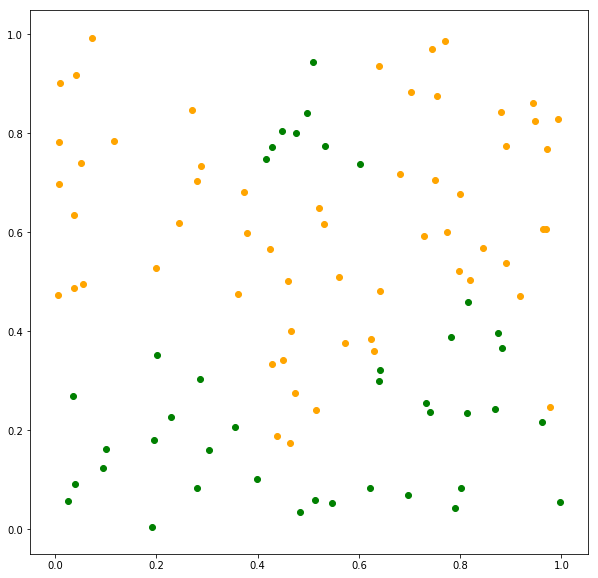

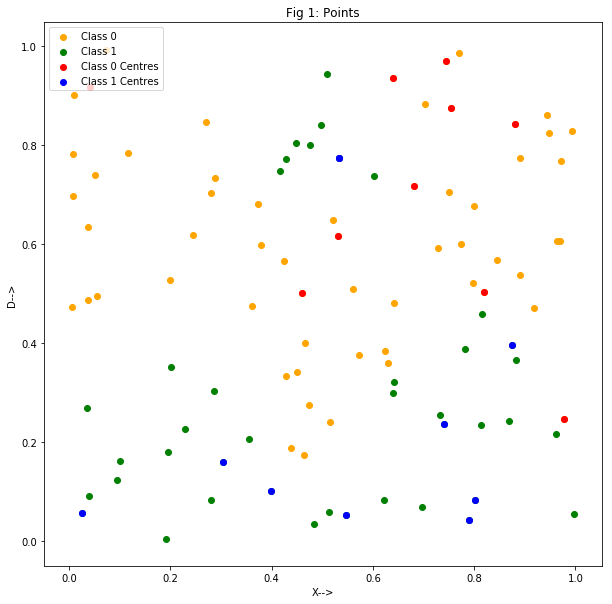

In [9]:
#Green: Class 0; Orange: Class 1
fig, ax = plt.subplots(figsize=(10,10));
plt.scatter(x_class_0,y_class_0, c = 'orange',label='Class 0');
plt.scatter(x_class_1,y_class_1, c = 'green',label='Class 1');

plt.scatter(cluster_0_x,cluster_0_y, c = 'red',label='Class 0 Centres');
plt.scatter(cluster_1_x,cluster_1_y, c = 'blue',label='Class 1 Centres');
plt.legend(loc='upper left')
plt.title('Fig 1: Points');
plt.ylabel('D-->');
plt.xlabel('X-->');
plt.show();

In [10]:
def calculateEuclideanDistance(x1,x2):
    return numpy.linalg.norm(numpy.subtract(x1,x2));

In [11]:
def calculateCentroid(inputList):
    center_x = 0.0;
    center_y = 0.0;
    
    if(len(inputList) > 0):
        for element in inputList:
            center_x = center_x + element[0];
            center_y = center_y + element[1];
            
        center_x = center_x/len(inputList);
        center_y = center_y/len(inputList); 

    centroid = [center_x,center_y];
    return numpy.array(centroid);

In [12]:
def KMeans(input_points,cluster_centers):
    epochs = 0;
    centroid_index_map = {};
    new_centroid_index_map = {};
    new_cluster_centers = [];
    nearest_neighbors_map = {};
    
    for i in range(0,len(cluster_centers)):
            centroid_index_map[i] = cluster_centers[i];            
    
    while(numpy.array_equal(new_cluster_centers,cluster_centers) == False):
        if len(new_cluster_centers) > 0:
            cluster_centers = new_cluster_centers;
            new_cluster_centers = [];
        
        for i in range(0,len(cluster_centers)):
            nearest_neighbors_map[i] = [];            

        #Calcuate the nearest neighbors to each cluster center and assign them to their respective cluster centers:
        for point in input_points:
            min_distance = 1000;
            cluster_index = -1;
            for i in range(0,len(cluster_centers)):
                new_distance = calculateEuclideanDistance(point,cluster_centers[i]);
                if min_distance > new_distance:
                    min_distance = new_distance;
                    cluster_index = i;

            nearest_neighbors_map.get(cluster_index).append(point);

        #Calcuate the new cluster centers:
        for index,neighbors in nearest_neighbors_map.items():
            if len(neighbors) == 0:
                new_centroid = centroid_index_map.get(index);
            else:
                new_centroid = calculateCentroid(neighbors);
            centroid_index_map[index] = new_centroid;
            new_cluster_centers.append(new_centroid);
        
        epochs = epochs + 1;
        print("Epochs: ",epochs);
        #print("Old Cluster Center:",len(cluster_centers),cluster_centers);
        #print("New Cluster Center:",len(new_cluster_centers),new_cluster_centers);
        
    return numpy.array(new_cluster_centers);

In [13]:
print("Calculating Class 0 Cluster Centers - KMeans");
class0_final_centres = KMeans(class_0,class0_cluster_centres)

Calculating Class 0 Cluster Centers - KMeans
Epochs:  1
Epochs:  2
Epochs:  3
Epochs:  4
Epochs:  5


In [14]:
print("Calculating Class 1 Cluster Centers - KMeans");
class1_final_centres = KMeans(class_1,class1_cluster_centres)

Calculating Class 1 Cluster Centers - KMeans
Epochs:  1
Epochs:  2
Epochs:  3
Epochs:  4
Epochs:  5


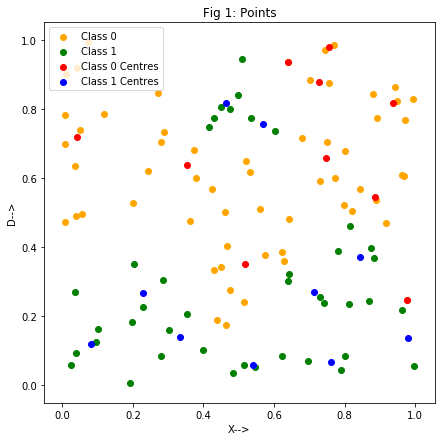

In [15]:
#Green: Class 0; Orange: Class 1
fig, ax = plt.subplots(figsize=(7,7));
plt.scatter(x_class_0,y_class_0, c = 'orange',label='Class 0');
plt.scatter(x_class_1,y_class_1, c = 'green',label='Class 1');

plt.scatter(*zip(*class0_final_centres),c = 'red',label='Class 0 Centres');
plt.scatter(*zip(*class1_final_centres),c = 'blue',label='Class 1 Centres');
plt.legend(loc='best')
plt.title('Fig 1: Points');
plt.ylabel('D-->');
plt.xlabel('X-->');
plt.show();

In [16]:
merged_cluster_centers = [element for element in class0_final_centres];

for element in class1_final_centres:
    merged_cluster_centers.append(element);
    
print(len(merged_cluster_centers));
print(merged_cluster_centers)

20
[array([ 0.75691105,  0.9782705 ]), array([ 0.35207542,  0.63768817]), array([ 0.7288124 ,  0.87874902]), array([ 0.885742  ,  0.54453931]), array([ 0.0403069 ,  0.71859451]), array([ 0.97670714,  0.2469399 ]), array([ 0.63970509,  0.93614067]), array([ 0.74689042,  0.65808883]), array([ 0.93807536,  0.81675492]), array([ 0.51734161,  0.35137759]), array([ 0.97932947,  0.13597432]), array([ 0.76272446,  0.06537442]), array([ 0.54164612,  0.05687077]), array([ 0.08106906,  0.11780227]), array([ 0.84429342,  0.37058356]), array([ 0.46287763,  0.8181718 ]), array([ 0.71306822,  0.26906345]), array([ 0.22810184,  0.26527494]), array([ 0.56784442,  0.75509024]), array([ 0.33404776,  0.13786824])]


In [17]:
def calculateNewCoordinates(x,variance,cluster_centers):
    new_x = []
    for centre in cluster_centers:
        temp = calculateEuclideanDistance(x,centre);
        temp1 = (-1.0 * math.pow(temp,2))/(2*math.pow(variance,2));
        distance = math.exp(temp1);
        new_x.append(distance);
    return numpy.array(new_x);

In [18]:
new_x = [];
variance = numpy.var(x_i);
for i in range(0,len(x_i)):
    new_x.append(calculateNewCoordinates(x_i[i],variance,merged_cluster_centers));

new_x = numpy.array(new_x);   

In [19]:
print(new_x.shape)

(100, 20)


In [20]:
W = numpy.random.uniform(-10,10,size=(m,1));
eta = 1;
bias = numpy.random.uniform(-1,1);
errors = {};

In [21]:
def activationFunction(x):
    if x >= 0:
        return 1;
    else:
        return -1;

In [22]:
def countMissClassificationErrors(weights,x_input,theta,actual_class_list,errors,epoch):
    for i in range(0,len(x_input)):
        temp_x = x_input[i];
        temp_x.resize(m,1);
        actual_class = actual_class_list[i];
        dot_product = numpy.matmul(numpy.transpose(temp_x),weights);
        updated_product = dot_product + theta;
        predicted_class = activationFunction(updated_product);
        if actual_class != predicted_class:
            errors[epoch] = errors.get(epoch) + 1;

In [23]:
def updateWeights(x_input,actual_class_list,weights,theta,learning_rate):
    for i in range(0,len(x_input)):
        temp_x = numpy.transpose(x_input[i]);
        temp_x.resize(m,1);
        actual_class = actual_class_list[i];
        dot_product = numpy.matmul(numpy.transpose(temp_x),weights);
        updated_product = dot_product + theta;
        predicted_class = activationFunction(updated_product);
        difference = actual_class - predicted_class;
        theta = theta + (eta * difference);
        delta_w = learning_rate * difference * temp_x;
        weights = numpy.add(weights,delta_w);        
        
    return theta,weights;    

In [24]:
def train_perceptron():
    epoch = 0;
    tempW = W;
    theta = bias;
    while True:
        errors[epoch] = 0;
        countMissClassificationErrors(tempW,new_x,theta,d,errors,epoch);
        epoch = epoch + 1;
        theta,tempW = updateWeights(new_x,d,tempW,theta,eta);
        index = epoch - 1;
        if(errors[epoch - 1]/float(len(new_x)) < 0.01):
            print("Epochs:",epoch," Missclassifications:",errors[epoch - 1],errors[epoch - 1]/float(len(new_x)));
            break;
        else:
            print("Epochs:",epoch," Missclassifications:",errors[epoch - 1],errors[epoch - 1]/float(len(new_x)));
            
        #if(epoch == 10000):
         #   break
    return tempW;

In [25]:
updated_weights = train_perceptron();

Epochs: 1  Missclassifications: 36 0.36
Epochs: 2  Missclassifications: 33 0.33
Epochs: 3  Missclassifications: 19 0.19
Epochs: 4  Missclassifications: 16 0.16
Epochs: 5  Missclassifications: 16 0.16
Epochs: 6  Missclassifications: 17 0.17
Epochs: 7  Missclassifications: 15 0.15
Epochs: 8  Missclassifications: 16 0.16
Epochs: 9  Missclassifications: 15 0.15
Epochs: 10  Missclassifications: 14 0.14
Epochs: 11  Missclassifications: 18 0.18
Epochs: 12  Missclassifications: 17 0.17
Epochs: 13  Missclassifications: 18 0.18
Epochs: 14  Missclassifications: 17 0.17
Epochs: 15  Missclassifications: 16 0.16
Epochs: 16  Missclassifications: 16 0.16
Epochs: 17  Missclassifications: 16 0.16
Epochs: 18  Missclassifications: 15 0.15
Epochs: 19  Missclassifications: 14 0.14
Epochs: 20  Missclassifications: 16 0.16
Epochs: 21  Missclassifications: 12 0.12
Epochs: 22  Missclassifications: 0 0.0


In [26]:
print(updated_weights.shape);

(20, 1)


In [27]:
#Choose Random points:
random_n = 2000;
random_x1 = numpy.linspace(0,1,random_n);
random_y1 = numpy.linspace(0,1,random_n);

random_x = [];
for i in range(0,random_n):
    for j in range(0,random_n):
        random_x.append([random_x1[i],random_y1[j]]);
print (len(random_x));

4000000


In [ ]:
new_variance = numpy.var(random_x);
g_x = [];
for element in random_x:
    temp = calculateNewCoordinates(element,new_variance,merged_cluster_centers);
    temp.resize(m,1);
    sum = 0.0;
    for i in range(0,m):
        sum = sum + (temp[i] * updated_weights[i]);
    sum = sum + bias;
    
    if sum > -0.001 and sum < 0.001:
        g_x.append(element);

In [29]:
print(len(g_x));
print(g_x[0]);

gx_xcoordinate = [element[0] for element in g_x];
gx_ycoordinate = [element[1] for element in g_x];

print(len(gx_xcoordinate));
print(len(gx_ycoordinate));


643
[0.0015007503751875936, 0.30465232616308152]
643
643


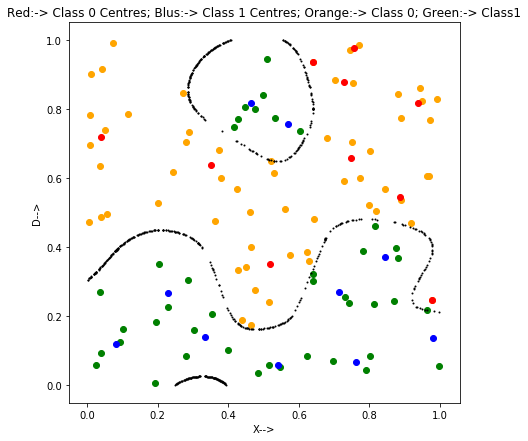

In [30]:
#Green: Class 0; Orange: Class 1
fig, ax = plt.subplots(figsize=(7,7));
plt.scatter(x_class_0,y_class_0, c = 'orange',label='Class 0');
plt.scatter(x_class_1,y_class_1, c = 'green',label='Class 1');

plt.scatter(*zip(*class0_final_centres),  c = 'red',label='Class 0 Centres');
plt.scatter(*zip(*class1_final_centres), c = 'blue',label='Class 1 Centres');
plt.scatter(*zip(*g_x),s = 1, c = 'black',label='Margin');
#plt.legend(loc='')
plt.title('Red:-> Class 0 Centres; Blus:-> Class 1 Centres; Orange:-> Class 0; Green:-> Class1');
plt.ylabel('D-->');
plt.xlabel('X-->');
plt.show();